
# Datatset Descriptions

## Comments
Tracks user comments on posts, showing engagement through text and likes. This dataset highlights individual participation in conversations and allows for sentiment analysis to gauge user satisfaction or sentiment trends.

## Posts
Tracks posts created by users, including how much interaction they received. This dataset provides insights into content creation and engagement levels through metrics like likes, comments, and posting frequency.

## Streams
Captures information about the various communication streams created within the platform. Streams provide context for discussions, grouping posts and comments by team, project, or topic to analyze collaboration and engagement patterns.

## Users
Basic info about the users, including their roles and whether they left the platform. It also includes demographics, organizational data, and activity metrics to assess the relationship between engagement and turnover risks.

## User Activity
Tracks every interaction a user has with the platform (e.g., browsing or posting). This dataset captures the temporal and behavioral patterns of users, including device preferences, activity types (GET/POST), and platform usage trends, enabling detailed time-series analysis.


# Set Up

In [ ]:
# Install required Python libraries
!pip install cycler


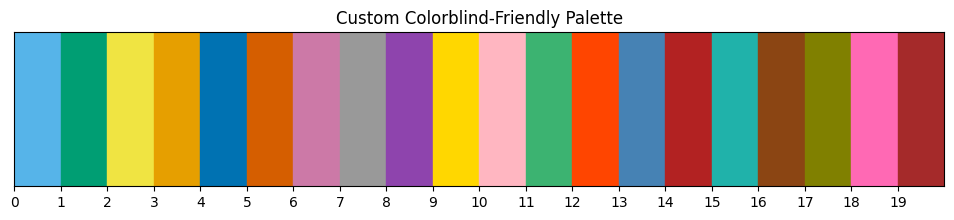

In [ ]:
# Libraries for EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
from tqdm import tqdm # For progress bar in Jupyter/Colab environments

# Set default figure size for plots
plt.rcParams['figure.figsize'] = (10, 6)

# Set the default color cycle for matplotlib with a colorblind-friendly palette
color_palette = [
    "#56B4E9",  # sky blue
    "#009E73",  # green
    "#F0E442",  # yellow
    "#E69F00",  # orange
    "#0072B2",  # blue
    "#D55E00",  # red-orange
    "#CC79A7",  # pink
    "#999999",  # grey
    "#8E44AD",  # purple
    "#FFD700",  # gold
    "#FFB6C1",  # light pink
    "#3CB371",  # medium sea green
    "#FF4500",  # orange-red
    "#4682B4",  # steel blue
    "#B22222",  # firebrick
    "#20B2AA",  # light sea green
    "#8B4513",  # saddle brown
    "#808000",  # olive
    "#FF69B4",  # hot pink
    "#A52A2A",  # brown
]

plt.rcParams['axes.prop_cycle'] = cycler(color=color_palette)


# Plot a test to visualize the colors
fig, ax = plt.subplots(figsize=(12, 2))
for i, color in enumerate(color_palette):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(color_palette))
ax.set_yticks([])
ax.set_xticks(range(len(color_palette)))
plt.title("Custom Colorblind-Friendly Palette")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Comments

In [ ]:
# Read the CSV file
comment= pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/TT/DATA/comment_cleaned.csv',
    parse_dates=['comment_created_date'], dtype={'comment_like_count': 'int64'}
)

comment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634720 entries, 0 to 634719
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stream_name           634720 non-null  object        
 1   post_id               634720 non-null  object        
 2   post_title            634720 non-null  object        
 3   comment_created_date  634720 non-null  datetime64[ns]
 4   comment_id            634720 non-null  object        
 5   userid                634720 non-null  object        
 6   username              634720 non-null  object        
 7   comment_text          634720 non-null  object        
 8   comment_like_count    634720 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 43.6+ MB


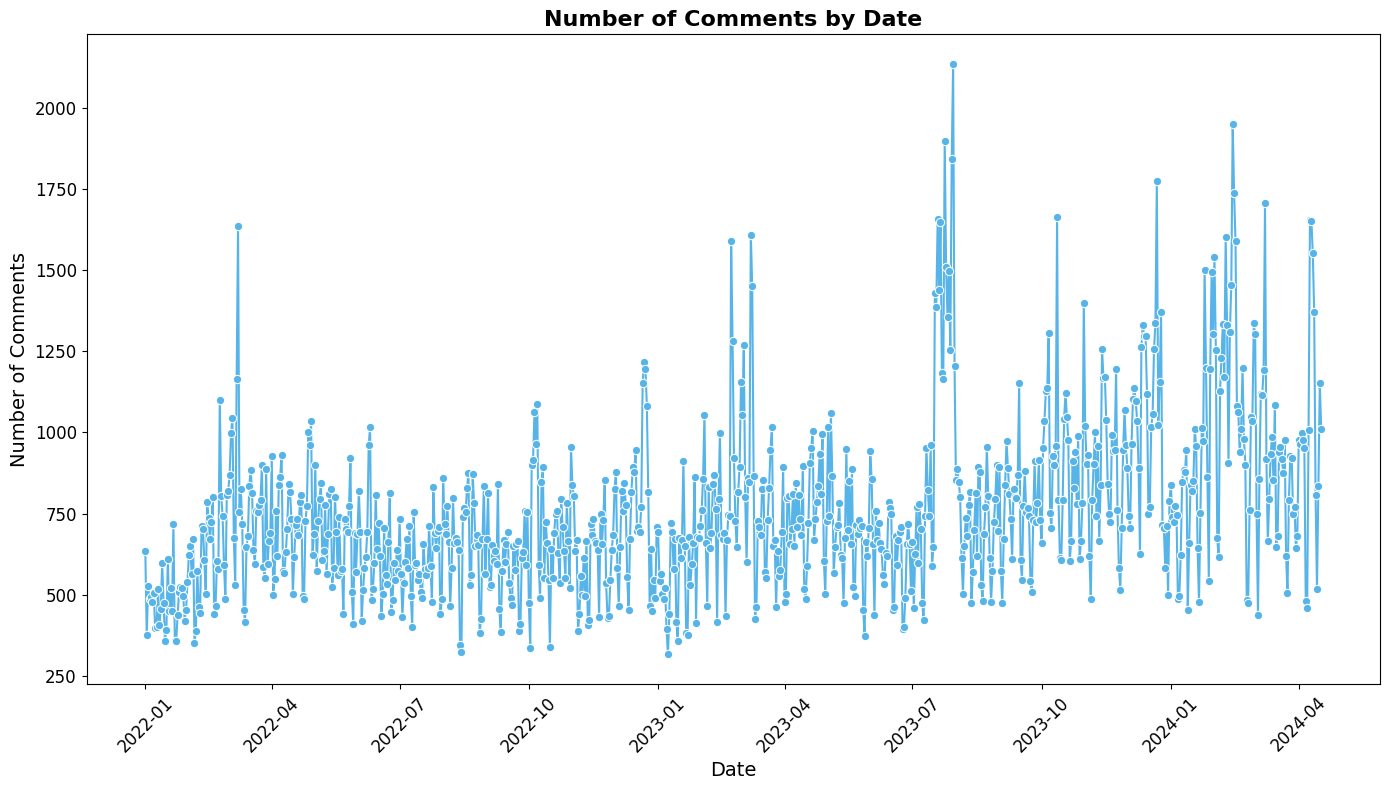

In [ ]:
# Extract only the date part from 'comment_created_date'
comment['comment_date'] = comment['comment_created_date'].dt.date

# Count the number of comments per date
comments_by_date = comment.groupby('comment_date').size().reset_index(name='comment_count')

# Sort by date (optional, if not already sorted)
comments_by_date.sort_values('comment_date', inplace=True)

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=comments_by_date, x='comment_date', y='comment_count', marker='o')

# Customize the plot
plt.title('Number of Comments by Date', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
# Remove the grid lines
plt.grid(False)  # Disable the grid completely

# Adjust layout for better appearance
plt.tight_layout()
plt.show()



In [ ]:
# Sort the DataFrame by the 'comment_like_count' column in descending order
top_10_comments = comment.sort_values('comment_like_count', ascending=False).head(10)

# Select the relevant columns
top_10_comments = top_10_comments[['stream_name', 'post_id', 'post_title',
                                    'comment_created_date', 'comment_like_count', 'comment_id',
                                    'username', 'comment_text']]

# Display the top 10 most popular comments
print("Top 10 Most Popular Comments:")
print(top_10_comments.to_string(index=False))




Top 10 Most Popular Comments:
           stream_name   post_id            post_title comment_created_date  comment_like_count comment_id  username                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Posts

In [ ]:
# Read the CSV file
post= pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/TT/DATA/post_cleaned.csv',
    parse_dates=['post_created_date'], dtype={'post_like_count': 'int64', 'post_comment_count': 'int64'}
)

post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247305 entries, 0 to 247304
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   stream_name         247305 non-null  object        
 1   stream_id           247305 non-null  object        
 2   post_id             247305 non-null  object        
 3   userid              247305 non-null  object        
 4   post_created_date   247305 non-null  datetime64[ns]
 5   post_title          247305 non-null  object        
 6   post_text           247305 non-null  object        
 7   post_like_count     247305 non-null  int64         
 8   post_comment_count  247305 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.0+ MB


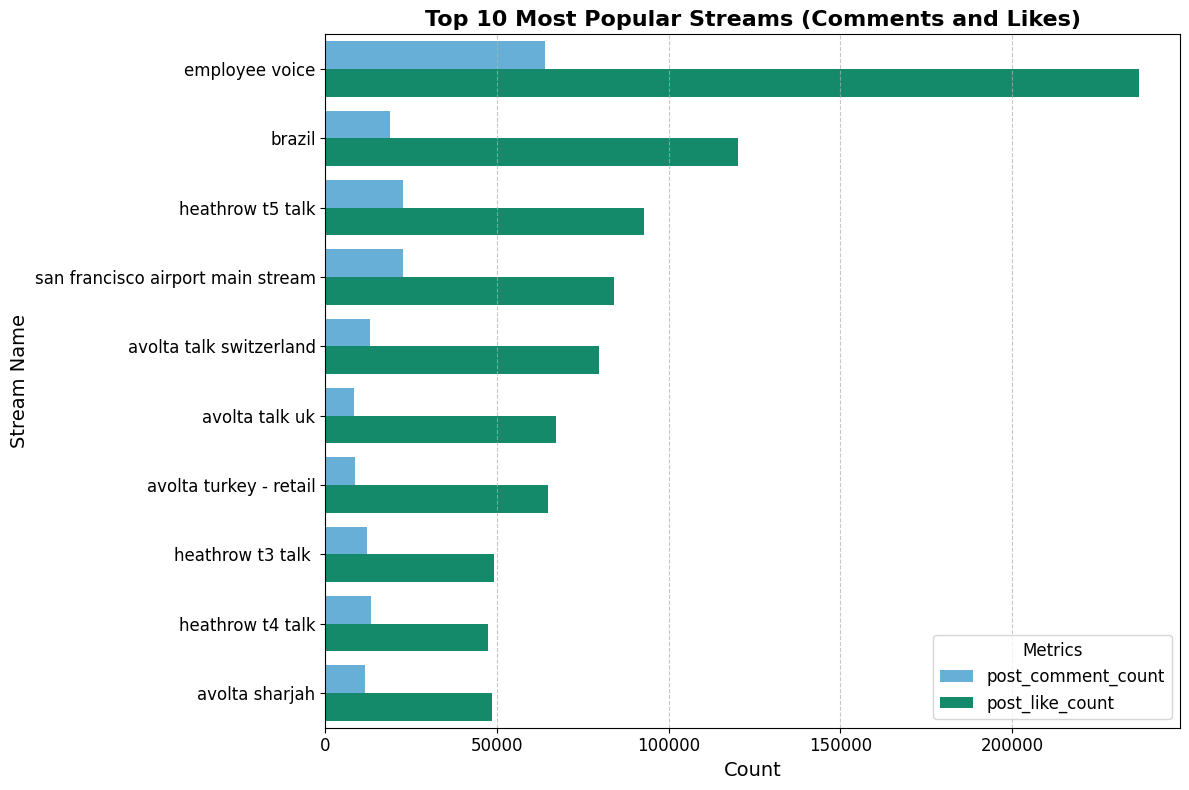

In [ ]:
# Aggregate the total comments and likes by stream_name
stream_stats = post.groupby('stream_name')[['post_comment_count', 'post_like_count']].sum().reset_index()

# Add a "popularity" metric by summing comments and likes
stream_stats['popularity'] = stream_stats['post_comment_count'] + stream_stats['post_like_count']

# Get the top 10 most popular streams based on "popularity"
top_10_streams = stream_stats.nlargest(10, 'popularity')

# Reshape the data for Seaborn's hue parameter
top_10_streams_melted = top_10_streams.melt(id_vars='stream_name',
                                            value_vars=['post_comment_count', 'post_like_count'],
                                            var_name='metric', value_name='count')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_streams_melted,
            x='count', y='stream_name', hue='metric',
            palette=color_palette[:2])  # Use first 2 colors of the custom palette

# Customize the plot
plt.title('Top 10 Most Popular Streams (Comments and Likes)', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Stream Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Metrics', fontsize=12, title_fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


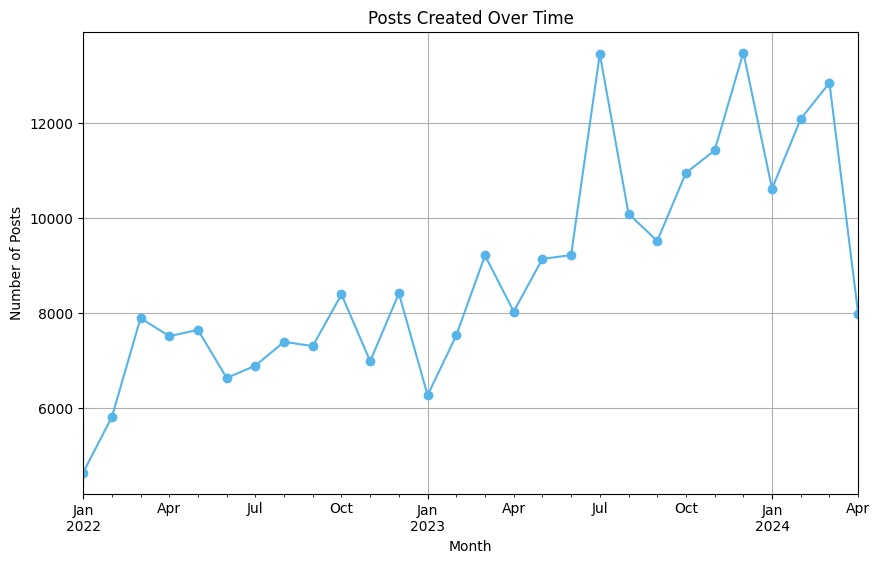

In [ ]:
# Group post creation dates by month
post['post_created_month'] = post['post_created_date'].dt.to_period('M')  # Grouping by month
posts_per_month = post.groupby('post_created_month').size()

# Plot the data
plt.figure(figsize=(10, 6))
posts_per_month.plot(kind='line', marker='o')
plt.title('Posts Created Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.grid()
plt.show()


# Streams

In [ ]:
# Read the CSV file
stream = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/TT/DATA/stream_cleaned.csv',
    parse_dates=['stream_created_at'],  # Parse the datetime column
    dtype={
        'stream_name': 'object',  # Stream name as string
        'stream_id': 'object',    # Stream ID as string
        'org_unit_id': 'object'   # Organizational unit ID as string
    }
)

# Display DataFrame information to confirm correct parsing
stream.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   stream_created_at  573 non-null    datetime64[ns]
 1   stream_name        573 non-null    object        
 2   stream_id          573 non-null    object        
 3   org_unit_id        573 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 18.0+ KB


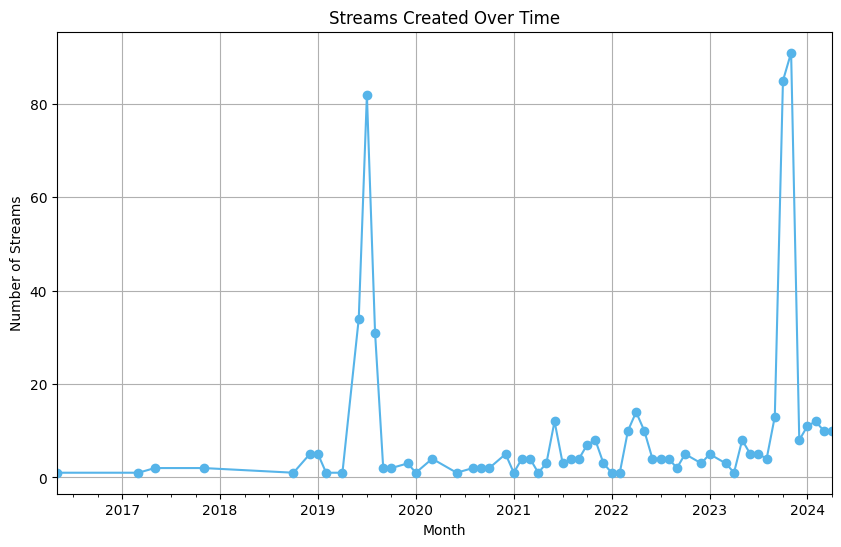

In [ ]:
# Convert to a time period for grouping (e.g., by month)
stream['stream_created_month'] = stream['stream_created_at'].dt.to_period('M')

# Group by the new column and count
streams_per_month = stream.groupby('stream_created_month').size()

# Plot the data
plt.figure(figsize=(10, 6))
streams_per_month.plot(kind='line', marker='o')
plt.title('Streams Created Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.grid()
plt.show()

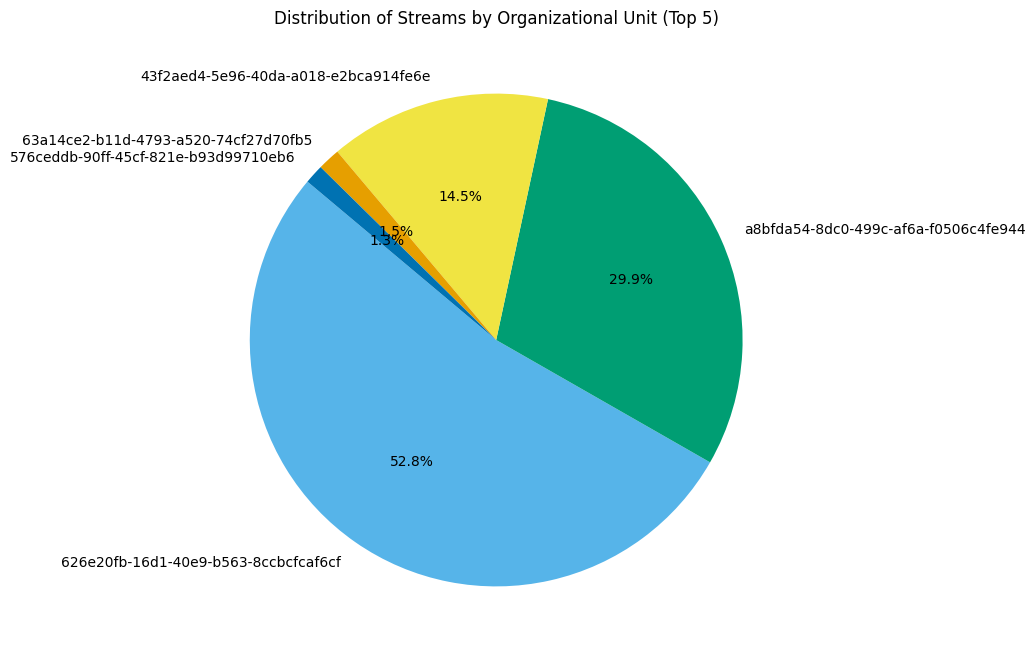

In [ ]:
# Count streams per org_unit_id
streams_by_org = stream['org_unit_id'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
streams_by_org.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Streams by Organizational Unit (Top 5)')
plt.ylabel('')
plt.show()


# Users

In [ ]:
# Read the CSV file
user = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/TT/DATA/user_cleaned.csv',
    parse_dates=[
        'first_login', 'last_login', 'updated', 'used', 'suspended_at', 'created'  # Columns to parse as datetime
    ],
    dtype={
        'suspended': 'bool',                 # Boolean column
        'stream_id': 'object',              # Float column for IDs or numeric values
        'userid': 'object',                  # User ID as string
        'org_unit_id': 'object',             # Organizational unit ID as string
        'display_name_extension': 'object',  # String column for name extensions
        'position': 'object',                # Position as string
        'country': 'object',                 # Country as string
        'total_of_departments': 'int64',     # Integer column for department counts
        'total_of_jobs': 'int64'             # Integer column for job counts
    }
)

# Display DataFrame information to confirm correct parsing and data types
user.info()

# Show the first few rows to verify the data
print(user.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151632 entries, 0 to 151631
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   first_login             63468 non-null   datetime64[ns]
 1   suspended               151632 non-null  bool          
 2   stream_id               151632 non-null  object        
 3   userid                  151632 non-null  object        
 4   org_unit_id             151632 non-null  object        
 5   last_login              63468 non-null   datetime64[ns]
 6   updated                 151632 non-null  datetime64[ns]
 7   used                    63464 non-null   datetime64[ns]
 8   display_name_extension  151632 non-null  object        
 9   suspended_at            76809 non-null   datetime64[ns]
 10  created                 151632 non-null  datetime64[ns]
 11  position                151632 non-null  object        
 12  country                 151632

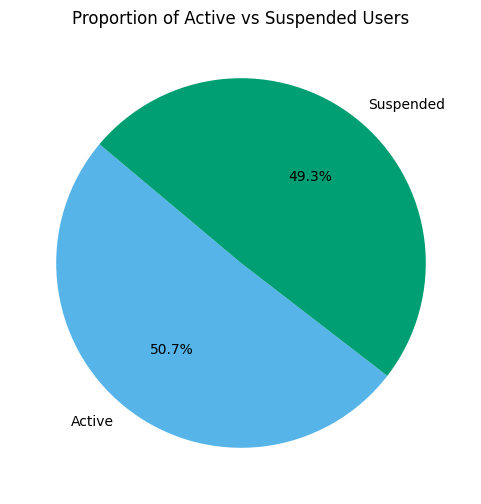

In [ ]:
# Count suspended vs active users
user_status = user['suspended'].value_counts()

# Plot the data
plt.figure(figsize=(6, 6))
user_status.plot(kind='pie', autopct='%1.1f%%', labels=['Active', 'Suspended'], startangle=140)
plt.title('Proportion of Active vs Suspended Users')
plt.ylabel('')
plt.show()


<ipython-input-38-3ead57ea19bf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


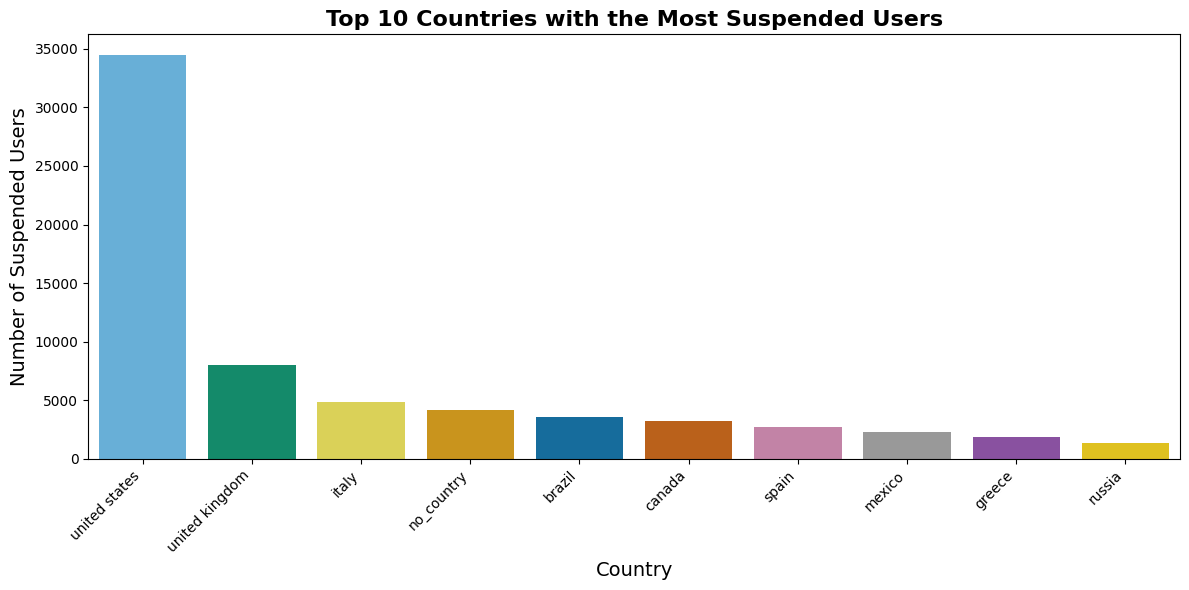

In [ ]:
# Group by country and count suspended users
suspended_by_country = user[user['suspended'] == True].groupby('country')['suspended'].count().reset_index()

# Sort by suspended count in descending order and get the top 10
top_10_suspended_countries = suspended_by_country.sort_values('suspended', ascending=False).head(10)

# Configure the size of the plot
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(
    x='country',
    y='suspended',
    data=top_10_suspended_countries,
    palette=color_palette[:10],  # Apply custom palette
    legend=False  # Avoid warnings about future deprecations
)

plt.title('Top 10 Countries with the Most Suspended Users', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Suspended Users', fontsize=14)

# Rotate the labels on the x-axis for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlaps
plt.tight_layout()

# Show plot
plt.show()

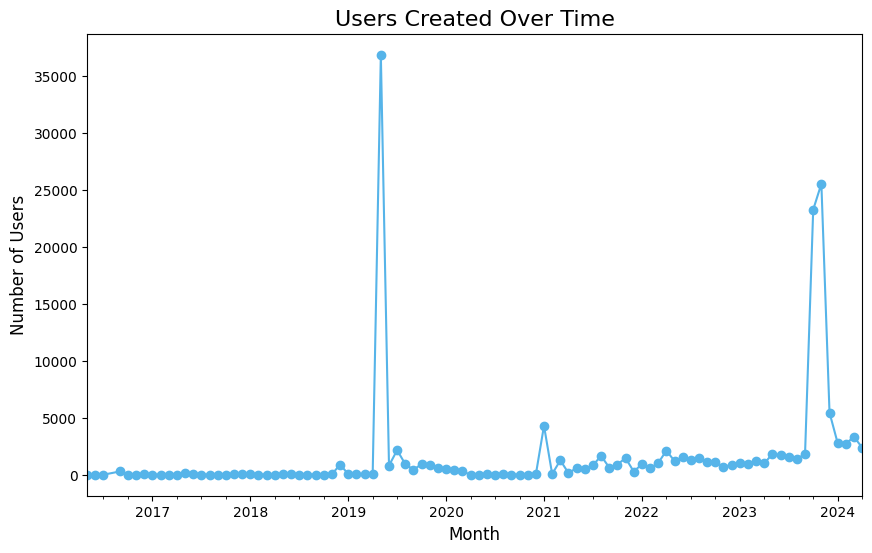

In [ ]:
# Group user creation dates by month
user['created_month'] = user['created'].dt.to_period('M')

# Count the number of users created per month
users_per_month = user.groupby('created_month').size()

# Plot the data
plt.figure(figsize=(10, 6))
users_per_month.plot(kind='line', marker='o')  # Keep the lines and points
plt.title('Users Created Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
# Remove the grid lines
plt.grid(False)  # Disable the grid completely
plt.show()



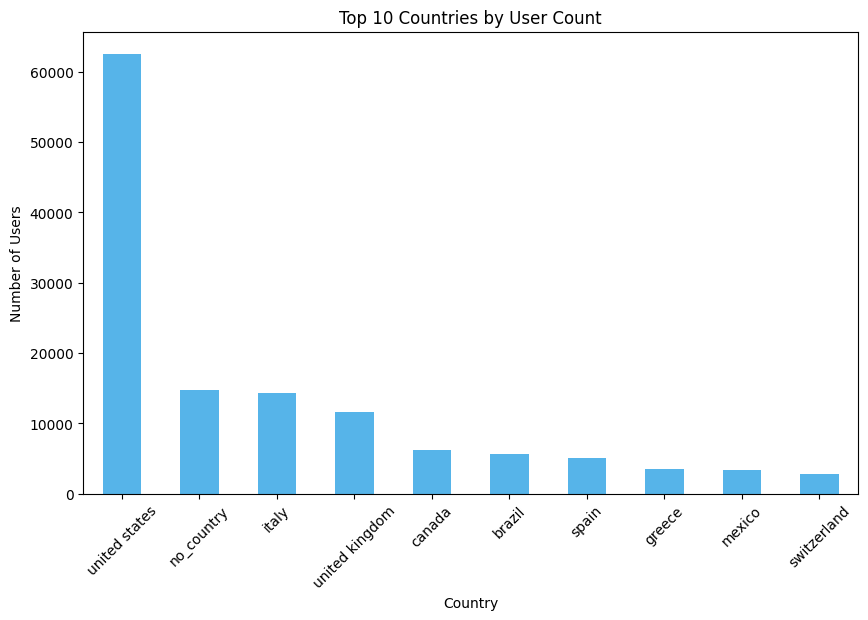

In [ ]:
# Count users per country
users_by_country = user['country'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 6))
users_by_country.plot(kind='bar')
plt.title('Top 10 Countries by User Count')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


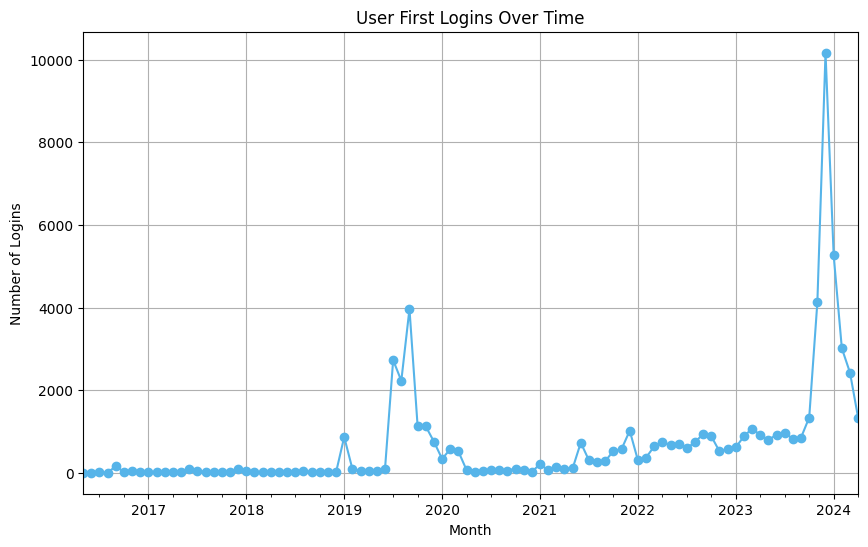

In [ ]:
# Group by month of first login
user['first_login_month'] = user['first_login'].dt.to_period('M')
logins_per_month = user.groupby('first_login_month').size()

# Plot the data
plt.figure(figsize=(10, 6))
logins_per_month.plot(kind='line', marker='o')
plt.title('User First Logins Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Logins')
plt.grid()
plt.show()


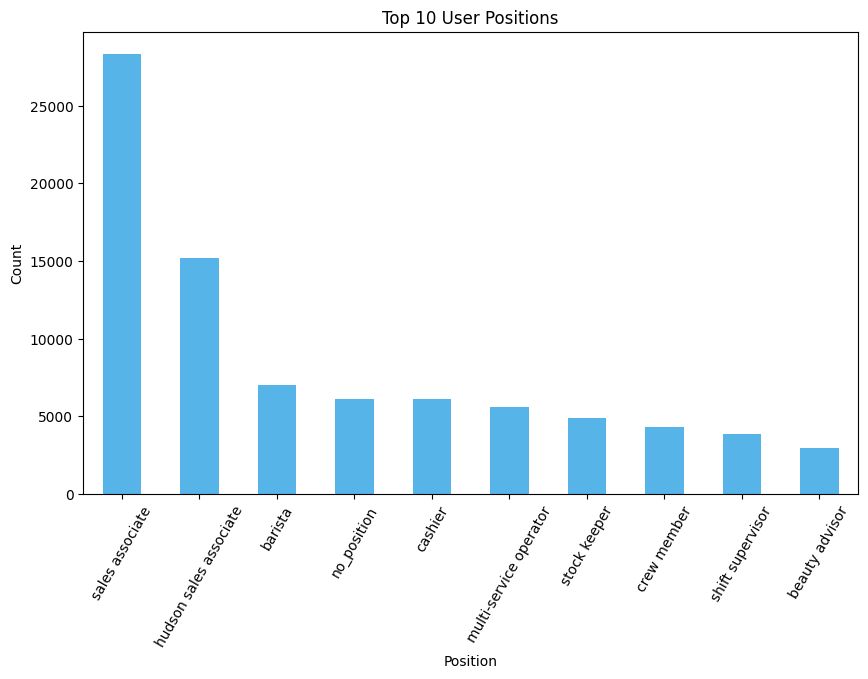

In [ ]:
# Count top positions
top_positions = user['position'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_positions.plot(kind='bar')
plt.title('Top 10 User Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()


# User Activity

In [ ]:
# Path to the compressed CSV file
input_path = '/content/drive/MyDrive/Colab Notebooks/TT/DATA_CX/activity_cleaned.csv.gz'

# Set the chunk size for reading
chunk_size = 1_000_000  # Number of rows per chunk

# Initialize an empty list to store chunks
chunks = []

# Read the file in chunks with a dynamic progress bar
print("Loading CSV file in chunks...")
with tqdm(total=None, desc="Loading CSV in chunks", unit="chunk") as pbar:
    for chunk in pd.read_csv(input_path, compression='gzip', chunksize=chunk_size):
        chunks.append(chunk)
        pbar.update(1)  # Update the progress bar for each chunk

# Combine chunks into a single DataFrame
activity = pd.concat(chunks, ignore_index=True)

# Display the first few rows to confirm successful loading
print("CSV file successfully loaded into a DataFrame.")
print(activity.info())

Loading CSV file in chunks...


Loading CSV in chunks: 81chunk [01:14,  1.09chunk/s]


CSV file successfully loaded into a DataFrame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80276825 entries, 0 to 80276824
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   occurred_at      object 
 1   userid           object 
 2   client           object 
 3   normalized_path  object 
 4   method           object 
 5   response_status  float64
 6   turnaround_time  float64
dtypes: float64(2), object(5)
memory usage: 4.2+ GB
None


In [ ]:
# Display DataFrame information to confirm correct parsing
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80276825 entries, 0 to 80276824
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   occurred_at      object 
 1   userid           object 
 2   client           object 
 3   normalized_path  object 
 4   method           object 
 5   response_status  float64
 6   turnaround_time  float64
dtypes: float64(2), object(5)
memory usage: 4.2+ GB


In [ ]:
# prompt: activity.head()
print(activity.head())

           occurred_at                                userid       client  \
0  2022-01-18 17:08:00  3d00d857-e2a0-48b2-a7c6-dd6e09c2ee1c  app-android   
1  2022-01-18 17:08:00  3d00d857-e2a0-48b2-a7c6-dd6e09c2ee1c  app-android   
2  2022-01-18 17:08:00  797b96b8-6481-4869-97ba-6a22aabcf0db  app-android   
3  2022-01-18 17:08:00  91d01612-5857-4a19-b824-b843c1b2e8b4      app-ios   
4  2022-01-18 17:08:00  9d789a87-b6f8-446d-ac28-9ce63bde2cb3      app-ios   

                            normalized_path method  response_status  \
0                           /posts/{postid}    GET            200.0   
1                           /posts/{postid}    GET            200.0   
2                       /streams/{streamid}    GET            200.0   
3  /conversations/{conversationid}/messages    GET            200.0   
4                  /posts/{postid}/comments    GET            200.0   

   turnaround_time  
0            228.0  
1            225.0  
2             95.0  
3            306.0  
4    

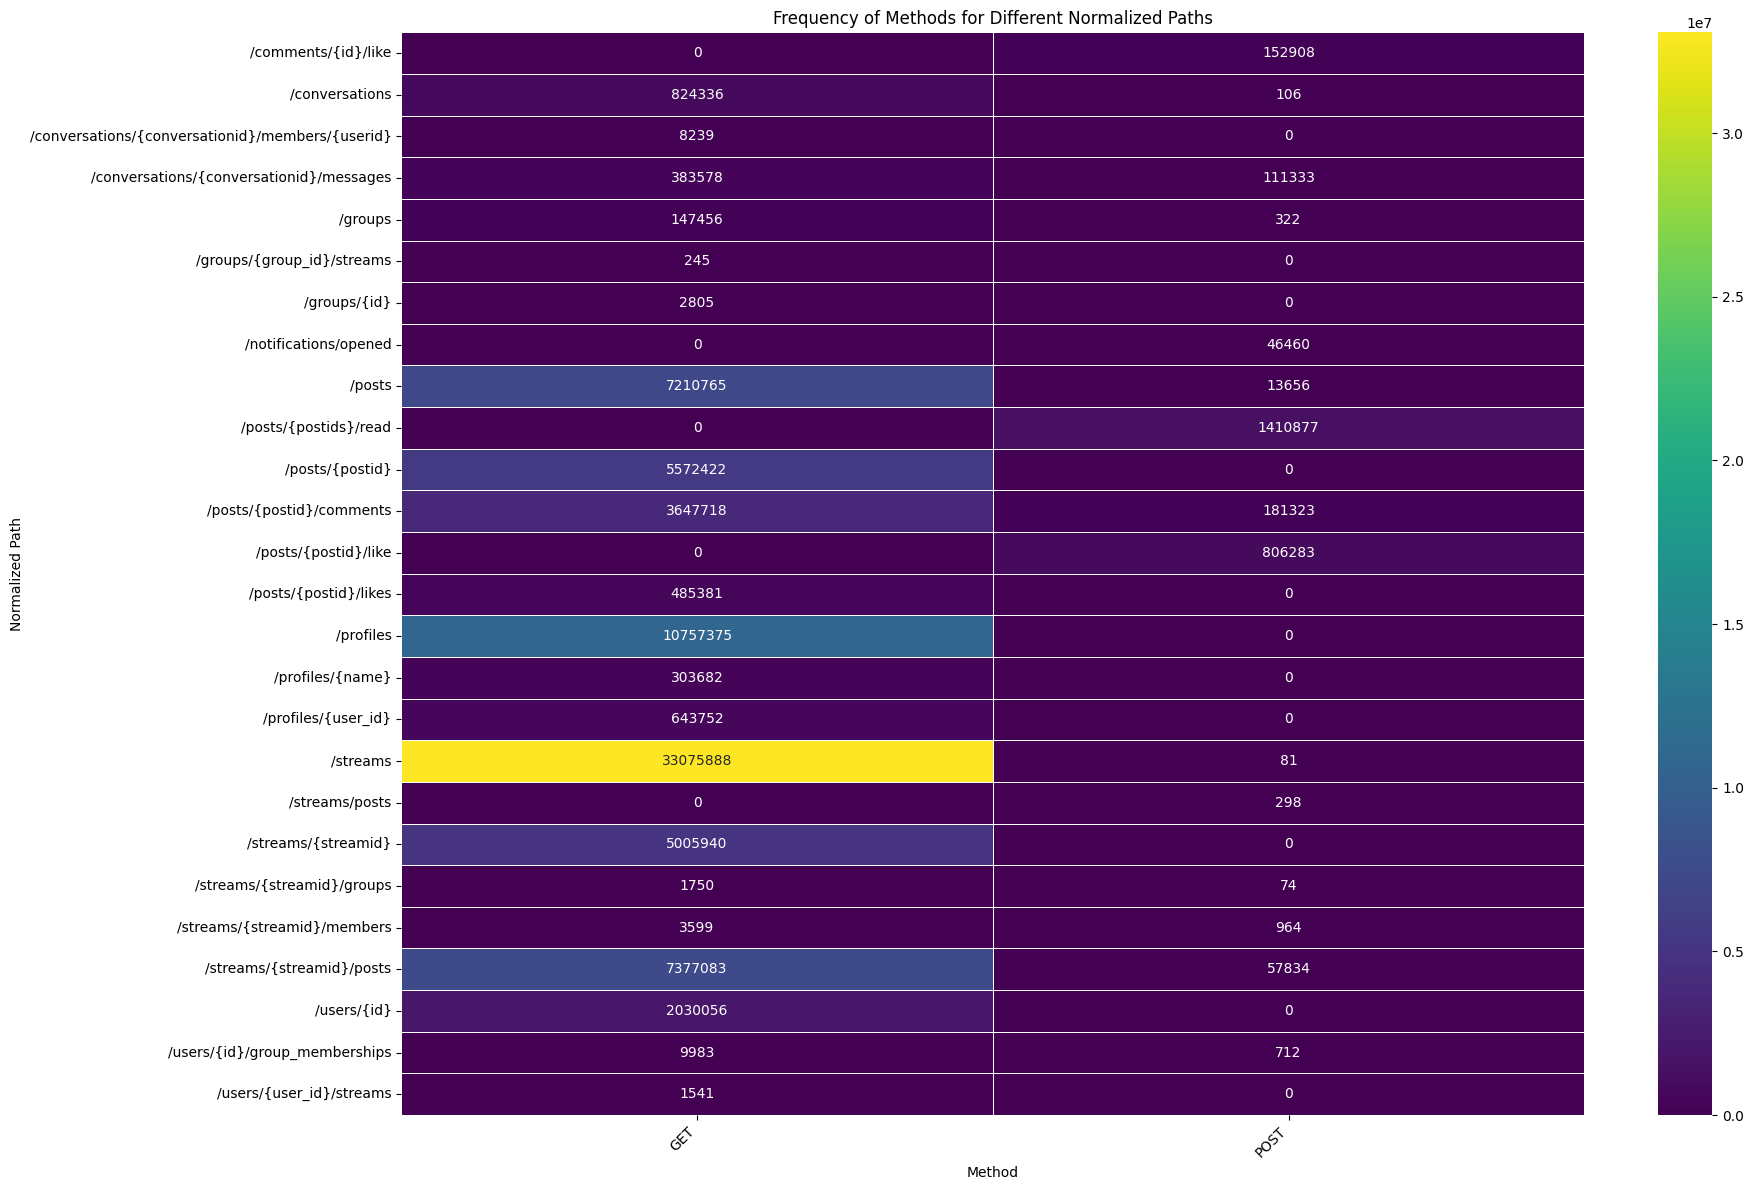

In [ ]:
# Create the heatmap
plt.figure(figsize=(19, 12))
heatmap_data = activity.groupby(['normalized_path', 'method']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.title('Frequency of Methods for Different Normalized Paths')
plt.xlabel('Method')
plt.ylabel('Normalized Path')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

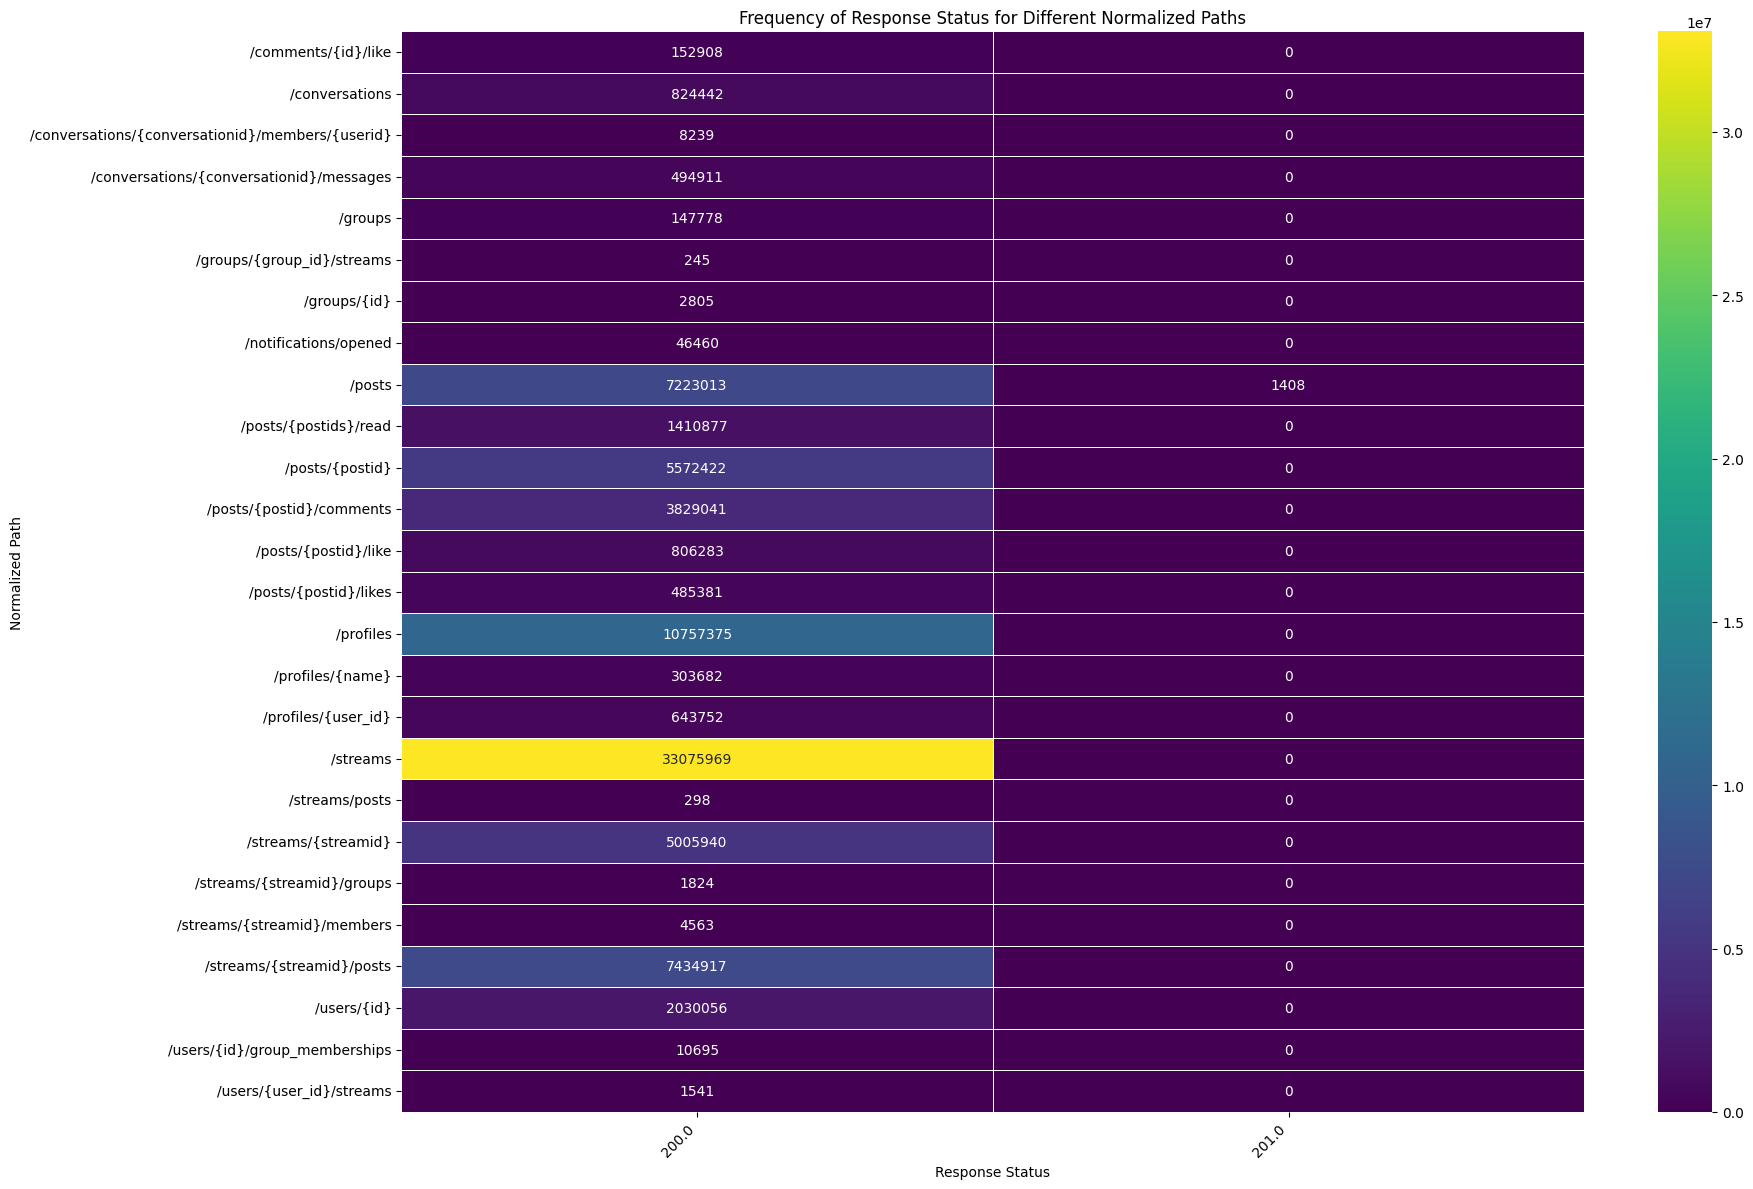

In [ ]:
# Create the heatmap
plt.figure(figsize=(19, 12))
heatmap_data = activity.groupby(['normalized_path', 'response_status']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.title('Frequency of Response Status for Different Normalized Paths')
plt.xlabel('Response Status')
plt.ylabel('Normalized Path')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

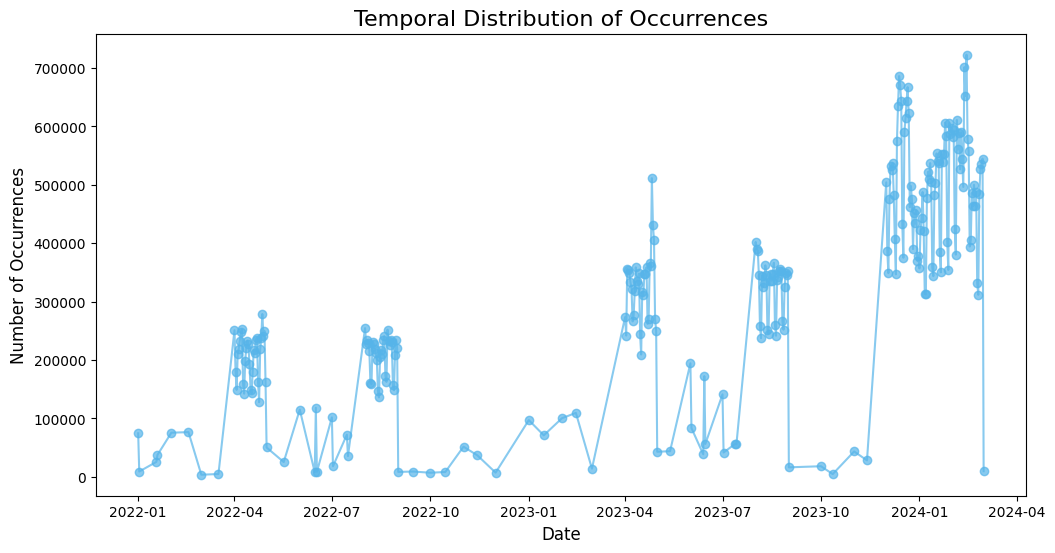

In [ ]:
# Ensure 'occurred_at' is in datetime format
activity['occurred_at'] = pd.to_datetime(activity['occurred_at'])

# Create a new column with the date only (without time)
activity['date'] = activity['occurred_at'].dt.date

# Count the number of occurrences per day
daily_counts = activity.groupby('date').size()

# Plot the temporal distribution
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', alpha=0.7)  # Keep the lines and points
plt.title('Temporal Distribution of Occurrences', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
# Remove the grid lines
plt.grid(False)  #


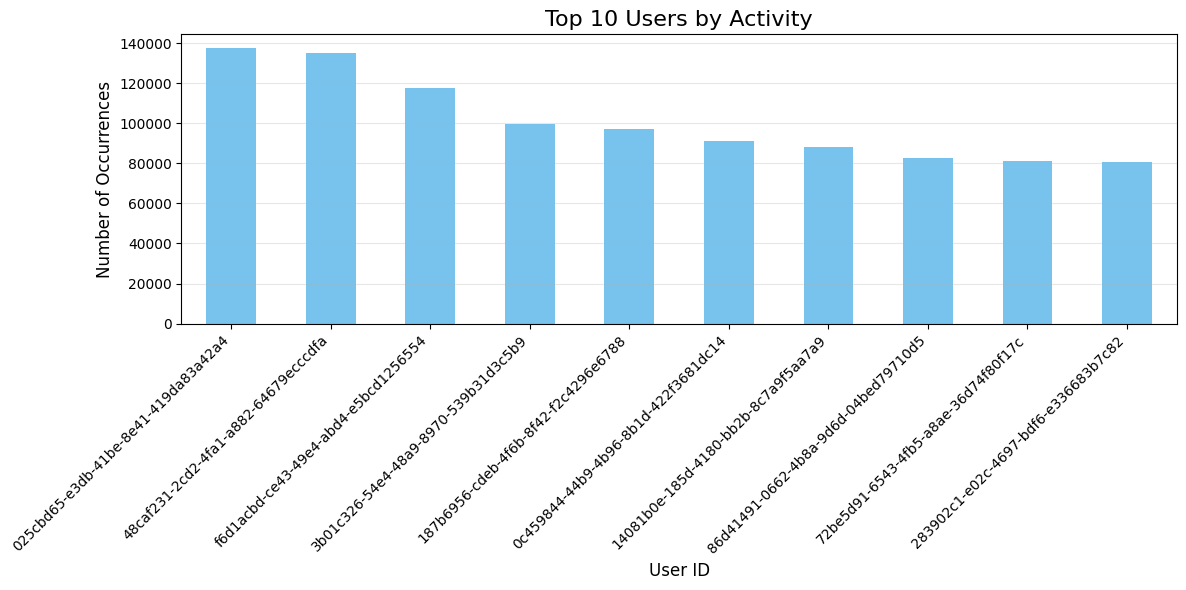

In [ ]:
# Count occurrences per user
user_counts = activity['userid'].value_counts()

# Display the top 10 users with the most activity
top_users = user_counts.head(10)

# Bar plot for the top 10 users
plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', alpha=0.8)
plt.title('Top 10 Users by Activity', fontsize=16)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

